In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import warnings
import nltk
from collections import Counter
from pprint import pprint
import random
import emoji
import regex
import re

sns.set_theme(style="ticks", color_codes=True)


In [4]:
def getDataFrame(file_name):
    df=pd.read_csv(file_name)
    return df

In [5]:
df1=getDataFrame('reddit_wsb.csv')


In [6]:

df=pd.DataFrame()
df = df1[['score','comms_num','title','body']].copy()
df

,score,comms_num,title,body
0,55,6,"It's not about the money, it's about sending a...",NaN
1,110,23,Math Professor Scott Steiner says the numbers ...,NaN
2,0,47,Exit the system,The CEO of NASDAQ pushed to halt trading “to g...
3,29,74,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,NaN
4,71,156,"Not to distract from GME, just thought our AMC...",NaN
...,...,...,...,...
47135,175,144,There is no crash coming for growth stocks - b...,"First off, yes I’m holding some heavy bags\n\n..."
47136,27,144,I give to you Roblox. Basically at it’s open p...,NaN
47137,69,44,$Baba about to put me in the streets 😓,NaN
47138,31,24,Is this enough ?,NaN


In [7]:
print(df.shape)

(47140, 4)


In [8]:
df.describe()

,score,comms_num
count,47140.000000,47140.000000
mean,1454.319113,245.877726
std,8383.142215,2570.380633
min,0.000000,0.000000
25%,1.000000,2.000000
50%,32.000000,14.000000
75%,195.000000,53.000000
max,348241.000000,93268.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47140 entries, 0 to 47139
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   score      47140 non-null  int64 
 1   comms_num  47140 non-null  int64 
 2   title      47140 non-null  object
 3   body       22090 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.4+ MB


In [10]:
for column in df:
    print(column)
    print(df[column].isnull().sum().sum())


score
0
comms_num
0
title
0
body
25050


In [11]:
df=df.dropna()

In [12]:
df

,score,comms_num,title,body
2,0,47,Exit the system,The CEO of NASDAQ pushed to halt trading “to g...
6,317,53,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,Hedgefund whales are spreading disinfo saying ...
7,405,178,THIS IS THE MOMENT,Life isn't fair. My mother always told me that...
10,222,70,"We need to keep this movement going, we all ca...",I believe right now is one of those rare oppo...
12,0,16,"Once you're done with GME - $AG and $SLV, the ...",You guys are champs. GME... who would have tho...
...,...,...,...,...
47129,23,23,FLGT Fulgent Genetics Earnings Record!,I am long on FLGT! I think way too many people...
47130,42,31,Anyone here in $PINS?,Before you laugh at me just indulge me for a f...
47131,25,9,Changes to Calls/Puts Open Interest Holdings W...,How many total open interest calls were added...
47133,45,59,Uranium DD,TL:DR - Supply and demand fundamentals require...


In [13]:
for column in df:
    print(column)
    print(df[column].isnull().sum().sum())


score
0
comms_num
0
title
0
body
0


In [14]:
df.loc[(df.score <=50 ),'score']= 0
df.loc[(df.score >50 ),'score']= 1

/Users/asher/opt/anaconda3/envs/tensorflow12/lib/python3.6/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/asher/opt/anaconda3/envs/tensorflow12/lib/python3.6/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [15]:
df

,score,comms_num,title,body
2,0,47,Exit the system,The CEO of NASDAQ pushed to halt trading “to g...
6,1,53,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,Hedgefund whales are spreading disinfo saying ...
7,1,178,THIS IS THE MOMENT,Life isn't fair. My mother always told me that...
10,1,70,"We need to keep this movement going, we all ca...",I believe right now is one of those rare oppo...
12,0,16,"Once you're done with GME - $AG and $SLV, the ...",You guys are champs. GME... who would have tho...
...,...,...,...,...
47129,0,23,FLGT Fulgent Genetics Earnings Record!,I am long on FLGT! I think way too many people...
47130,0,31,Anyone here in $PINS?,Before you laugh at me just indulge me for a f...
47131,0,9,Changes to Calls/Puts Open Interest Holdings W...,How many total open interest calls were added...
47133,0,59,Uranium DD,TL:DR - Supply and demand fundamentals require...


In [16]:
df_1=pd.DataFrame()
df_1['title']=df.loc[(df.score == 1 ),'title']
df_1['body']=df.loc[(df.score == 1 ),'body']
df_1['num_comms']=df.loc[(df.score == 1 ),'comms_num']
df_1

,title,body,num_comms
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,Hedgefund whales are spreading disinfo saying ...,53
7,THIS IS THE MOMENT,Life isn't fair. My mother always told me that...,178
10,"We need to keep this movement going, we all ca...",I believe right now is one of those rare oppo...,70
13,$GME price has nothing to do with fundamentals...,"Firstly, all of you diamond hands and smooth-b...",61
19,"Daily Discussion Thread for January 28, 2021",Your daily trading discussion thread. Please k...,5942
...,...,...,...
47112,Regeneron ($RGEN) is rumored to be buying out ...,$REGN ($456) jointly filed an important patent...,138
47116,For those who actually watched the entire Hous...,"Full disclosure, I own many shares of both GME...",121
47118,ASO criminally undervalue and bound to have ma...,$ASO only going up since IPO\n\nCurrent market...,57
47124,Fed warns about potential for ‘significant dec...,The FED released their semi-annual Financial S...,89


In [17]:
line = ["🤔 🙈 me así, se 😌 ds 💕👭👙 hello 👩🏾‍🎓 emoji hello 👨‍👩‍👦‍👦 how are 😊 you today🙅🏽🙅🏽"]
a_line=re.findall(r'[^\w\s,.]', line[0])
print(a_line)

['🤔', '🙈', '😌', '💕', '👭', '👙', '👩', '🏾', '\u200d', '🎓', '👨', '\u200d', '👩', '\u200d', '👦', '\u200d', '👦', '😊', '🙅', '🏽', '🙅', '🏽']


In [18]:
df_0=pd.DataFrame()
df_0['title']=df.loc[(df.score == 0 ),'title']
df_0['body']=df.loc[(df.score == 0 ),'body']
df_0['num_comms']= df.loc[(df.score == 0 ),'comms_num']
df_0

,title,body,num_comms
2,Exit the system,The CEO of NASDAQ pushed to halt trading “to g...,47
12,"Once you're done with GME - $AG and $SLV, the ...",You guys are champs. GME... who would have tho...,16
65,Dillard's the short play no one is talking about,Dillard's has been quietly gaining attention t...,37
80,Can we ethically cash out our tendies?,So we ALL already know: Game Stop is going to ...,120
104,Fellow WSBers: Don't sleep on Demo Day. Accumu...,"EDIT AGAIN: Alright fine. My last $3,000 in ...",32
...,...,...,...
47128,Order Flow into the Billions ~ is that Reason for,A report just came out for the first quarter f...,15
47129,FLGT Fulgent Genetics Earnings Record!,I am long on FLGT! I think way too many people...,23
47130,Anyone here in $PINS?,Before you laugh at me just indulge me for a f...,31
47131,Changes to Calls/Puts Open Interest Holdings W...,How many total open interest calls were added...,9


In [19]:
print(len(df_1))
print(len(df_0))

7162
14928


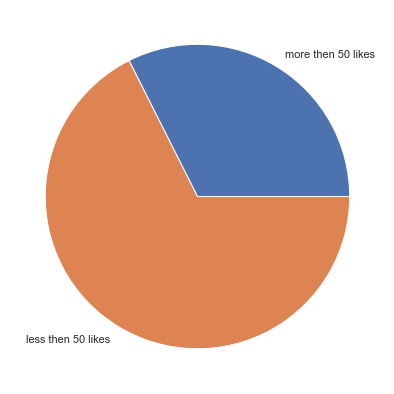

In [20]:
catgory=['more then 50 likes','less then 50 likes']
data = [len(df_1),len(df_0)]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = catgory)
plt.show()

# more and less title

In [21]:
#more then 50 likes 
more=''
for name in df_1.title:
    more+=name
more=more.lower()


In [22]:
#less then 50 likes 
less=''
for name in df_0.title:
    less+=name
less=less.lower()


# Tokenization

In [23]:
#for more then 50 liks 

In [24]:
tokenizer1=nltk.tokenize.RegexpTokenizer(r'\w+')
words1 = tokenizer1.tokenize(more)


tokenizer0=nltk.tokenize.RegexpTokenizer(r'\w+')
words0 = tokenizer0.tokenize(less)
print("less then 50 likes")
print(words0[:10])
print()
print("more then 50 likes")
print(words1[:10])

less then 50 likes
['exit', 'the', 'systemonce', 'you', 're', 'done', 'with', 'gme', 'ag', 'and']

more then 50 likes
['short', 'stock', 'doesn', 't', 'have', 'an', 'expiration', 'datethis', 'is', 'the']


In [25]:
stopWords=sorted(nltk.corpus.stopwords.words('english'))

stopWords[95:105]

['not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other']

In [26]:
words1 = [t.lower() for t in words1 if t not in stopWords]
words0 = [t.lower() for t in words0 if t not in stopWords]
print("less then 50 likes")
print(words0[:10])
print()
print("more then 50 likes")
print(words1[:10])

less then 50 likes
['exit', 'systemonce', 'done', 'gme', 'ag', 'slv', 'gentleman', 'short', 'squeeze', 'driven']

more then 50 likes
['short', 'stock', 'expiration', 'datethis', 'momentwe', 'need', 'keep', 'movement', 'going', 'make']


In [27]:
freqDist1={}
for t in sorted(set(words1)):
    freqDist1[t]=words1.count(t)

    
freqDist0={}
for t in sorted(set(words0)):
    freqDist0[t]=words0.count(t)
print("less then 50 likes")   
print(dict(list(freqDist0.items())[3650:3660]))
print()
print("more then 50 likes")
print(dict(list(freqDist1.items())[3650:3660]) )

less then 50 likes
{'crushing': 1, 'cruz': 1, 'crwd': 1, 'cry': 6, 'crybabiesgme': 1, 'crycan': 1, 'crying': 5, 'cryinghalt': 1, 'crypto': 10, 'cryptobros': 1}

more then 50 likes
{'expect': 10, 'expectations': 6, 'expectationsbiden': 1, 'expectationsjust': 1, 'expected': 10, 'expectedhexo': 1, 'expecting': 2, 'expects': 1, 'expeinteresting': 1, 'expense': 1}


In [28]:
def bagOfWords(tokens):
    '''
    Given list of tokens, return a dictionary where 
         keys  = words in the text
         value = count of the words in the text    
    '''    
    # put each word and the count into a dictionary
    freqDist={}
    for t in sorted(set(tokens)):
        freqDist[t]=tokens.count(t)
        
    return freqDist


# to use the function

bags1=bagOfWords(words1)
bags0=bagOfWords(words0)
print("more then 50 likes") 
print({k: bags1[k] for k in list(bags1.keys())[2500:2550]},' of ', len(bags1), ' words')
print()
print("less then 50 likes") 
print({k: bags0[k] for k in list(bags0.keys())[2500:2550]},' of ', len(bags0), ' words')

more then 50 likes
{'copied': 1, 'copies': 1, 'copy': 1, 'core': 2, 'corn': 2, 'corner': 6, 'cornered': 1, 'cornerswhy': 1, 'corno4825': 1, 'coronavirusyolo': 1, 'corp': 4, 'corpo': 1, 'corporation': 3, 'corporations': 1, 'correct': 4, 'correction': 5, 'correctiondays': 1, 'corrections': 4, 'correctionuse': 1, 'correlating': 1, 'correlation': 4, 'correlationblackberry': 1, 'corrupt': 6, 'corsair': 10, 'cortez': 1, 'cost': 12, 'costco': 1, 'costgambling': 1, 'costing': 3, 'costs': 1, 'coty': 1, 'could': 71, 'council': 1, 'counsel': 1, 'count': 6, 'counted': 3, 'counter': 6, 'counterfeit': 3, 'counting': 2, 'country': 4, 'counts': 1, 'coup': 2, 'couple': 8, 'cour': 1, 'course': 2, 'coursera': 1, 'court': 1, 'courtesy': 1, 'covaxin': 1, 'covaxinaphria': 1}  of  10727  words

less then 50 likes
{'bustwhat': 1, 'busy': 1, 'buti': 1, 'butnext': 1, 'butsuper': 1, 'butt': 2, 'button': 8, 'buttoons': 1, 'butts': 1, 'bux': 2, 'buy': 1340, 'buya': 1, 'buyable': 1, 'buyaccount': 1, 'buyactual': 1,

# most frequent words in the title

In [29]:
#more then 50 likes
sortedBags1 = sorted(bags1.items(), key=lambda x: x[1], reverse=True)
sortedBags1[:10]

[('gme', 1306),
 ('short', 409),
 ('dd', 337),
 ('amc', 327),
 ('buy', 260),
 ('stock', 257),
 ('squeeze', 231),
 ('market', 224),
 ('robinhood', 221),
 ('wsb', 180)]

In [30]:
#less then 50 likes
sortedBags0 = sorted(bags0.items(), key=lambda x: x[1], reverse=True)
sortedBags0[:10]

[('gme', 2092),
 ('buy', 1340),
 ('robinhood', 1055),
 ('amc', 972),
 ('hold', 734),
 ('stock', 489),
 ('sell', 437),
 ('still', 423),
 ('bb', 399),
 ('get', 383)]

In [31]:
bigram1 = list(nltk.bigrams(words1))
bigram1[:10]

[('short', 'stock'),
 ('stock', 'expiration'),
 ('expiration', 'datethis'),
 ('datethis', 'momentwe'),
 ('momentwe', 'need'),
 ('need', 'keep'),
 ('keep', 'movement'),
 ('movement', 'going'),
 ('going', 'make'),
 ('make', 'history')]

In [32]:
bigram0 = list(nltk.bigrams(words0))
bigram0[:10]

[('exit', 'systemonce'),
 ('systemonce', 'done'),
 ('done', 'gme'),
 ('gme', 'ag'),
 ('ag', 'slv'),
 ('slv', 'gentleman'),
 ('gentleman', 'short'),
 ('short', 'squeeze'),
 ('squeeze', 'driven'),
 ('driven', 'macro')]

In [33]:
bigramCount1={}
for t in sorted(set(bigram1)):
    bigramCount1[t]=bigram1.count(t)
sortedBigram1 = sorted(bigramCount1.items(), key=lambda x: x[1], reverse=True)
sortedBigram1[:10]

[(('discussion', 'thread'), 91),
 (('hedge', 'funds'), 90),
 (('short', 'squeeze'), 77),
 (('short', 'interest'), 73),
 (('moves', 'tomorrow'), 71),
 (('gme', 'amc'), 67),
 (('please', 'read'), 50),
 (('gme', 'short'), 49),
 (('diamond', 'hands'), 43),
 (('gamma', 'squeeze'), 37)]

In [34]:
bigramCount0={}
for t in sorted(set(bigram0)):
    bigramCount0[t]=bigram0.count(t)
sortedBigram0 = sorted(bigramCount0.items(), key=lambda x: x[1], reverse=True)
sortedBigram0[:10]

[(('buy', 'gme'), 290),
 (('gme', 'amc'), 235),
 (('hedge', 'funds'), 101),
 (('buy', 'dip'), 94),
 (('amc', 'gme'), 89),
 (('hold', 'line'), 89),
 (('amc', 'nok'), 83),
 (('amc', 'bb'), 73),
 (('buy', 'buy'), 73),
 (('class', 'action'), 72)]

In [35]:
trigram1 = list(nltk.trigrams(words1))
trigramCount1={}
for t in sorted(set(trigram1)):
    trigramCount1[t]=trigram1.count(t)
sortedTrigram1 = sorted(trigramCount1.items(), key=lambda x: x[1], reverse=True)
sortedTrigram1[:3]

[(('rules', 'please', 'read'), 36),
 (('daily', 'discussion', 'thread'), 23),
 (('discussion', 'thread', 'march'), 23)]

In [36]:
trigram0 = list(nltk.trigrams(words0))
trigramCount0={}
for t in sorted(set(trigram0)):
    trigramCount0[t]=trigram0.count(t)
sortedTrigram0 = sorted(trigramCount0.items(), key=lambda x: x[1], reverse=True)
sortedTrigram0[:3]


[(('daily', 'discussion', 'thread'), 54),
 (('ag', 'ag', 'ag'), 37),
 (('gme', 'amc', 'bb'), 35)]

Frequency of top 10, 3 words, less then 50 likes


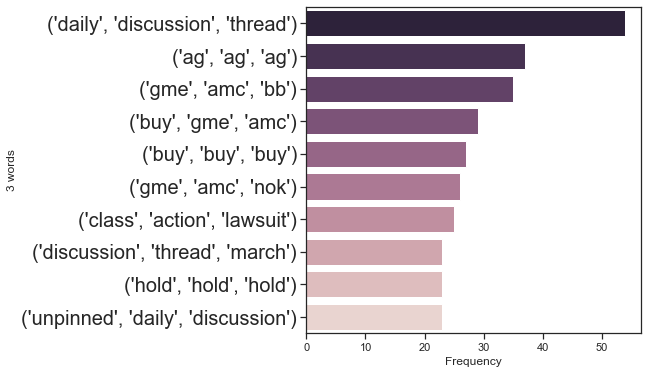

In [37]:


dfd=sortedTrigram0[:10]
w = []
m = []
f =pd.DataFrame()
for d in dfd:
    m.append(d[0])
    w.append(d[1])
    
f['w'] = w
f['m'] = m
print('Frequency of top 10, 3 words, less then 50 likes')

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x="w", y="m", data=f, palette=sns.cubehelix_palette(n_colors=10, reverse=True), ax=ax);


ax.tick_params(axis="y", labelsize=20)
plt.xlabel('Frequency')
plt.ylabel('3 words')
plt.show()
del f
del dfd


Frequency of top 10, 3 words, more then 50 likes


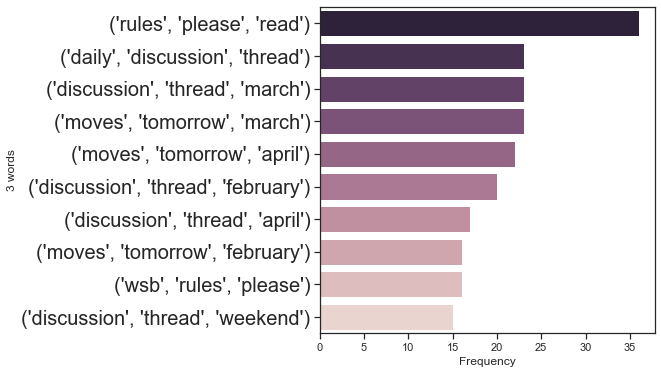

In [38]:
dfd=sortedTrigram1[:10]
w = []
m = []
f =pd.DataFrame()
for d in dfd:
    m.append(d[0])
    w.append(d[1])
    
f['w'] = w
f['m'] = m
print('Frequency of top 10, 3 words, more then 50 likes')

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x="w", y="m", data=f, palette=sns.cubehelix_palette(n_colors=10, reverse=True), ax=ax);


ax.tick_params(axis="y", labelsize=20)
plt.xlabel('Frequency')
plt.ylabel('3 words')
plt.show()
del f
del dfd

Frequency of top 10, 2 words, more then 50 likes


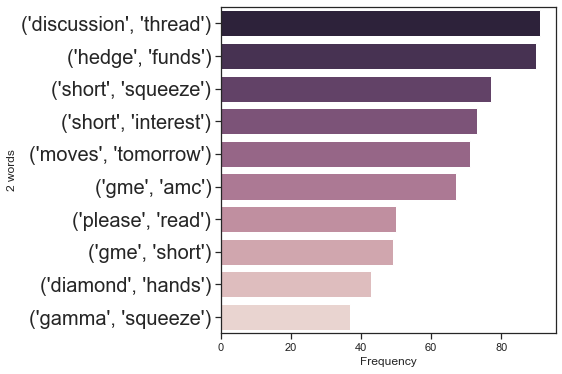

In [39]:
dfd=sortedBigram1[:10]
w = []
m = []
f =pd.DataFrame()
for d in dfd:
    m.append(d[0])
    w.append(d[1])
    
f['w'] = w
f['m'] = m
print('Frequency of top 10, 2 words, more then 50 likes')

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x="w", y="m", data=f, palette=sns.cubehelix_palette(n_colors=10, reverse=True), ax=ax);


ax.tick_params(axis="y", labelsize=20)
plt.xlabel('Frequency')
plt.ylabel('2 words')
plt.show()
del f
del dfd

Frequency of top 10, 2 words, less then 50 likes


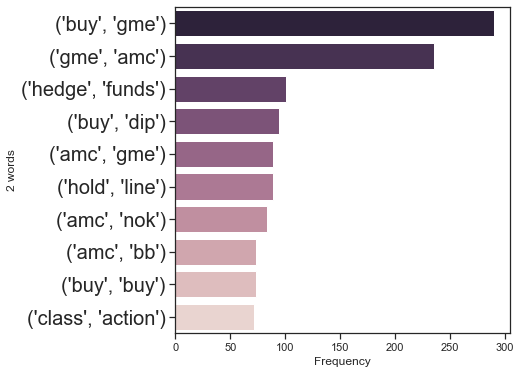

In [40]:
dfd=sortedBigram0[:10]
w = []
m = []
f =pd.DataFrame()
for d in dfd:
    m.append(d[0])
    w.append(d[1])
    
f['w'] = w
f['m'] = m
print('Frequency of top 10, 2 words, less then 50 likes')

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x="w", y="m", data=f, palette=sns.cubehelix_palette(n_colors=10, reverse=True), ax=ax);


ax.tick_params(axis="y", labelsize=20)
plt.xlabel('Frequency')
plt.ylabel('2 words')
plt.show()
del f
del dfd

Frequency of top 10, 1 words, less then 50 likes


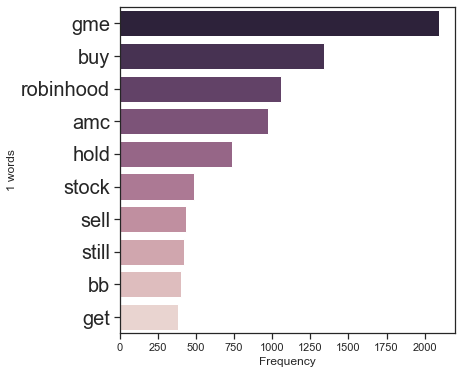

In [41]:
dfd=sortedBags0[:10]
w = []
m = []
f =pd.DataFrame()
for d in dfd:
    m.append(d[0])
    w.append(d[1])
    
f['w'] = w
f['m'] = m
print('Frequency of top 10, 1 words, less then 50 likes')

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x="w", y="m", data=f, palette=sns.cubehelix_palette(n_colors=10, reverse=True), ax=ax);

ax.tick_params(axis="y", labelsize=20)
plt.xlabel('Frequency')
plt.ylabel('1 words')
plt.show()
del f
del dfd

Frequency of top 10, 1 words, more then 50 likes


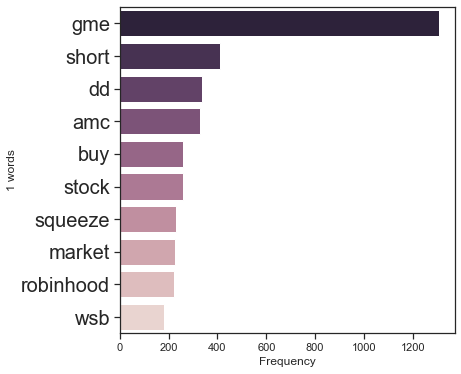

In [42]:
dfd=sortedBags1[:10]
w = []
m = []
f =pd.DataFrame()
for d in dfd:
    m.append(d[0])
    w.append(d[1])
    
f['w'] = w
f['m'] = m
print('Frequency of top 10, 1 words, more then 50 likes')

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x="w", y="m", data=f, palette=sns.cubehelix_palette(n_colors=10, reverse=True), ax=ax);


ax.tick_params(axis="y", labelsize=20)
plt.xlabel('Frequency')
plt.ylabel('1 words')
plt.show()
del f
del dfd

In [43]:
print(sortedTrigram1[0][0])

('rules', 'please', 'read')


In [44]:
print(sortedBags1[1][1])

409


# most frequent words in the Body

In [45]:
#more then 50 likes 
more_b=''
for name in df_1.body:
    more_b+=name
more_b=more_b.lower()

print(len(more_b))

16625414


In [46]:
#less then 50 likes 
less_b=''
for name in df_0.body:
    less_b+=name
less_b=less_b.lower()

print(len(less_b))

9565565


In [47]:
import spacy

In [50]:
less_b = less_b[:1000000]
more_b = more_b[:1000000]


In [51]:
doc=nlp(more_b)
for i in doc.ents:
    print(i.text, i.label_)


NameError: name 'nlp' is not defined

# Tokenization Body

In [52]:
tokenizer1_b=nltk.tokenize.RegexpTokenizer(r'\w+')
words1_b = tokenizer1_b.tokenize(more_b)


tokenizer0_b=nltk.tokenize.RegexpTokenizer(r'\w+')
words0_b = tokenizer0_b.tokenize(less_b)
print("less then 50 likes")
print(words0_b[:10])
print()
print("more then 50 likes")
print(words1_b[:10])

less then 50 likes
['the', 'ceo', 'of', 'nasdaq', 'pushed', 'to', 'halt', 'trading', 'to', 'give']

more then 50 likes
['hedgefund', 'whales', 'are', 'spreading', 'disinfo', 'saying', 'friday', 'is', 'make', 'or']


In [53]:
stopWords_b=sorted(nltk.corpus.stopwords.words('english'))

stopWords_b[95:105]

['not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other']

In [54]:
words1_b = [t.lower() for t in words1_b if t not in stopWords_b]
words0_b = [t.lower() for t in words0_b if t not in stopWords_b]
print("less then 50 likes")
print(words0_b[:10])
print()
print("more then 50 likes")
print(words1_b[:10])

less then 50 likes
['ceo', 'nasdaq', 'pushed', 'halt', 'trading', 'give', 'investors', 'chance', 'recalibrate', 'positions']

more then 50 likes
['hedgefund', 'whales', 'spreading', 'disinfo', 'saying', 'friday', 'make', 'break', 'gme', 'call']


In [55]:
trigram1_b = list(nltk.trigrams(words1_b))
trigramCount1_b={}
for t in sorted(set(trigram1_b)):
    trigramCount1_b[t]=trigram1_b.count(t)
sortedTrigram1_b = sorted(trigramCount1_b.items(), key=lambda x: x[1], reverse=True)
sortedTrigram1_b[:3]

[(('reddit', 'com', 'r'), 192),
 (('com', 'r', 'wallstreetbets'), 186),
 (('https', 'www', 'reddit'), 173)]

In [56]:
trigram0_b = list(nltk.trigrams(words0_b))
trigramCount0_b={}
for t in sorted(set(trigram0_b)):
    trigramCount0_b[t]=trigram0_b.count(t)
sortedTrigram0_b = sorted(trigramCount0_b.items(), key=lambda x: x[1], reverse=True)
sortedTrigram0_b[:3]

[(('nokia', 'nokia', 'nokia'), 95),
 (('https', 'preview', 'redd'), 77),
 (('stock', 'like', 'stock'), 67)]

In [57]:
def oftenUsedNGram(tokens,N):
    nGrams = list(nltk.ngrams(tokens, N))
    nGramCount={}
    for t in sorted(set(nGrams)):
        nGramCount[t]=nGrams.count(t)
    sortedNgram = sorted(nGramCount.items(), key=lambda x: x[1], reverse=True)
    return sortedNgram

In [58]:
#five words more then 50 likes
fiveGram1_b=oftenUsedNGram(words1_b,5)
fiveGram1_b[:3]

[(('https', 'www', 'reddit', 'com', 'r'), 157),
 (('www', 'reddit', 'com', 'r', 'wallstreetbets'), 152),
 (('reddit', 'com', 'r', 'wallstreetbets', 'search'), 106)]

In [59]:
#five words less then 50 likes
fiveGram0_b=oftenUsedNGram(words0_b,5)
fiveGram0_b[:3]

[(('nokia', 'nokia', 'nokia', 'nokia', 'nokia'), 92),
 (('like', 'stock', 'like', 'stock', 'like'), 62),
 (('stock', 'like', 'stock', 'like', 'stock'), 62)]

In [60]:
#eight words more then 50 likes 
eightGram1_b=oftenUsedNGram(words1_b,8)
eightGram1_b[:3]

[(('https', 'www', 'reddit', 'com', 'r', 'wallstreetbets', 'search', 'sort'),
  66),
 (('com', 'r', 'wallstreetbets', 'search', 'sort', 'top', 'q', 'flair'), 60),
 (('reddit', 'com', 'r', 'wallstreetbets', 'search', 'sort', 'top', 'q'), 60)]

In [61]:
#eight words less then 50 likes 
eightGram0_b=oftenUsedNGram(words0_b,8)
eightGram0_b[:3]

[(('nokia', 'nokia', 'nokia', 'nokia', 'nokia', 'nokia', 'nokia', 'nokia'),
  89),
 (('like', 'stock', 'like', 'stock', 'like', 'stock', 'like', 'stock'), 61),
 (('stock', 'like', 'stock', 'like', 'stock', 'like', 'stock', 'like'), 60)]

count =  91850
Frequency of top 10, 5 words, less then 50 likes


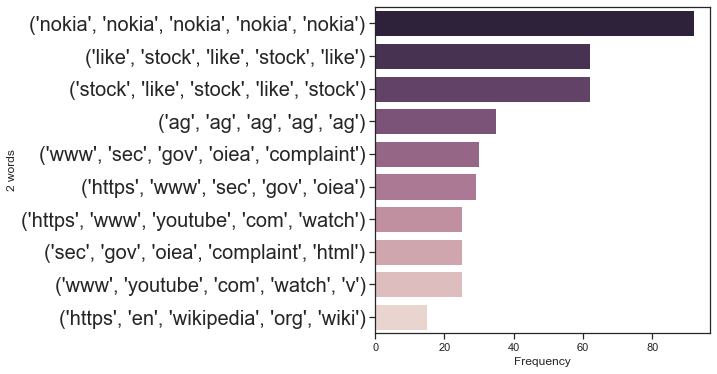

In [62]:
dfd=fiveGram0_b[:10]
w = []
m = []
f =pd.DataFrame()
for d in dfd:
    m.append(d[0])
    w.append(d[1])
    
f['w'] = w
f['m'] = m
print("count = ",len(fiveGram0_b))
print('Frequency of top 10, 5 words, less then 50 likes')

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x="w", y="m", data=f, palette=sns.cubehelix_palette(n_colors=10, reverse=True), ax=ax);


ax.tick_params(axis="y", labelsize=20)
plt.xlabel('Frequency')
plt.ylabel('2 words')
plt.show()
del f
del dfd

count =  88288
Frequency of top 10, 5 words, more then 50 likes


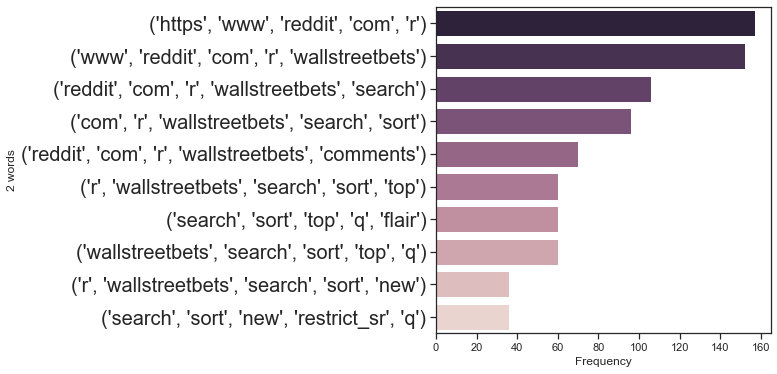

In [63]:
dfd=fiveGram1_b[:10]
w = []
m = []
f =pd.DataFrame()
for d in dfd:
    m.append(d[0])
    w.append(d[1])
    
f['w'] = w
f['m'] = m
print("count = ",len(fiveGram1_b))
print('Frequency of top 10, 5 words, more then 50 likes')

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x="w", y="m", data=f, palette=sns.cubehelix_palette(n_colors=10, reverse=True), ax=ax);


ax.tick_params(axis="y", labelsize=20)
plt.xlabel('Frequency')
plt.ylabel('2 words')
plt.show()
del f
del dfd

count =  92724
Frequency of top 10, 8 words, less then 50 likes


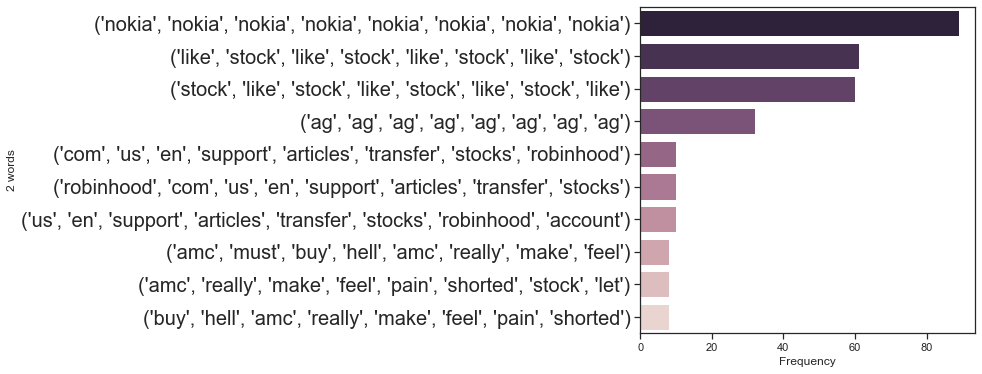

In [64]:
dfd=eightGram0_b[:10]
w = []
m = []
f =pd.DataFrame()
for d in dfd:
    m.append(d[0])
    w.append(d[1])
    
f['w'] = w
f['m'] = m
print("count = ",len(eightGram0_b))
print('Frequency of top 10, 8 words, less then 50 likes')

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x="w", y="m", data=f, palette=sns.cubehelix_palette(n_colors=10, reverse=True), ax=ax);


ax.tick_params(axis="y", labelsize=20)
plt.xlabel('Frequency')
plt.ylabel('2 words')
plt.show()
del f
del dfd

count =  89528
Frequency of top 10, 8 words, more then 50 likes


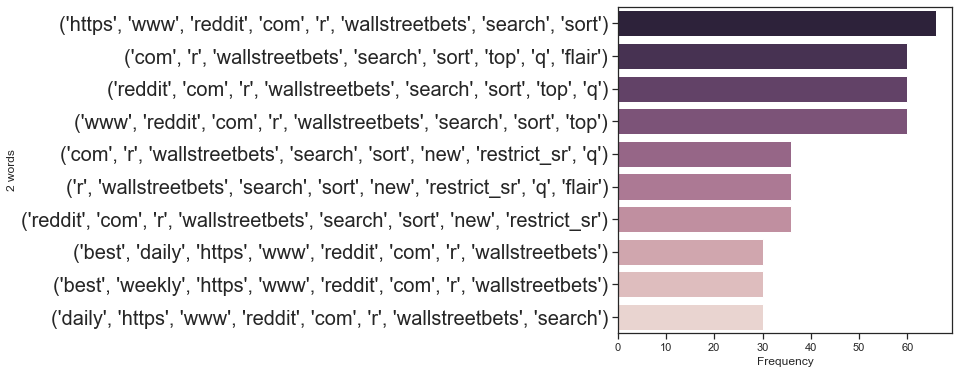

In [65]:
dfd=eightGram1_b[:10]
w = []
m = []
f =pd.DataFrame()
for d in dfd:
    m.append(d[0])
    w.append(d[1])
    
f['w'] = w
f['m'] = m
print("count = ",len(eightGram1_b))
print('Frequency of top 10, 8 words, more then 50 likes')

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x="w", y="m", data=f, palette=sns.cubehelix_palette(n_colors=10, reverse=True), ax=ax);


ax.tick_params(axis="y", labelsize=20)
plt.xlabel('Frequency')
plt.ylabel('2 words')
plt.show()
del f
del dfd

# Creating a text classification model

In [66]:
from spacy.tokens import DocBin
import spacy
from collections import Counter

In [67]:
# python -m spacy init fill-config ./base_config.cfg ./config.cfg
# python -m spacy train config.cfg --output ./output

In [68]:
print(spacy.__version__)

3.0.6


In [69]:
nlp = spacy.load("en_core_web_sm")

In [70]:
def make_docs(data):
    docs = []
    for doc, label in nlp.pipe(data, as_tuples=True):
        if label == 1:
            doc.cats["positive"] = 1
            doc.cats["negative"] = 0
        else:
            doc.cats["positive"] = 0
            doc.cats["negative"] = 1
        docs.append(doc)
    return (docs)

In [71]:
subset = df[['body','score']]


tuples = [tuple(x) for x in subset.to_numpy()]

x= list()

for var in range(len(tuples)):
    #print (tuples[var][0])
    if tuples[var][1] == 1:
        
        if re.findall(r'(https?://[^\s]+)', tuples[var][0]):
            x.append(re.findall(r'(https?://[^\s]+)', tuples[var][0]))

all_links=[]            
            
            

for i in range(len(x)):
    for j in range(len(x[i])):
        all_links.append(x[i][j])

print(all_links)

words_to_count = (word for word in all_links if word[:1].isupper())
c = Counter(words_to_count)
top_four = c.most_common(4)
print(top_four)


# print(type(x[3]))
# print(x[3])            

# num_texts = 500

# train_data = tuples[:11045]
# valid_data =tuples[11045:]
# print(len(train_data))
# print(len(valid_data))





# train_docs = make_docs(train_data[:num_texts])
# doc_bin = DocBin(docs=train_docs)
# doc_bin.to_disk("./data/train_hs.spacy")


# valid_docs = make_docs(valid_data[:num_texts])
# doc_bin = DocBin(docs=valid_docs)
# doc_bin.to_disk("./data/valid_hs.spacy")




['https://reddit.com/r/wallstreetbets/search?sort=new&restrict_sr=on&q=flair%3ADD)', 'https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair%3ADD&restrict_sr=on&t=day)', 'https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair%3ADD&restrict_sr=on&t=week)', 'https://reddit.com/r/wallstreetbets/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)', 'https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair%3ADiscussion&restrict_sr=on&t=day)', 'https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair%3ADiscussion&restrict_sr=on&t=week)', 'https://reddit.com/r/wallstreetbets/search?sort=new&restrict_sr=on&q=flair%3AYOLO)', 'https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair%3AYOLO&restrict_sr=on&t=day)', 'https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair%3AYOLO&restrict_sr=on&t=week)', 'https://reddit.com/r/wallstreetbets/search?sort=new&restrict_sr=on&q=flair%3AGain)', 'https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair

In [72]:
print(train_data[1])

NameError: name 'train_data' is not defined

In [73]:
text_to_test = "does and how it relates to current events surrounding GameStop and WSB\'s new favorite hedge fund, Melvin Capital. \n\nSeeing as how there\'s a few million more of you here now than there were last month when I was emptying the contents of the bowl of oatmeal that is my brain on these pages about [present day financial crimes perpetrated by Citadel and their ilk](https://old.reddit.com/r/wallstreetbets/comments/kbjpqy/an_alternative_hypothesis_for_psth_stripe_for_the/) and the [ouroboros of Western intelligence agencies and Big Capital](https://old.reddit.com/r/wallstreetbets/comments/kcm0r9/once_more_unto_the_breach_the_unified_field/), let\'s do"

In [74]:
nlp_model = spacy.load("output/model-last")

In [75]:
doc1 = nlp_model(text_to_test)

In [76]:
print(doc1.cats)

{'positive': 0.5692641139030457, 'negative': 0.43073588609695435}


In [ ]:
nlp = spacy.load("en_core_web_lg")
doc=nlp(more_b)
for i in doc.ents:
    print(i.text, i.label_)



# Most common words in English by Wikipedia  

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [2]:
driver = webdriver.Chrome('/Users/asher/Desktop/chrome_driver/chromedriver')
driver.get('https://en.wikipedia.org/wiki/Most_common_words_in_English')

In [3]:
tit = driver.find_elements_by_xpath('//*[@id="Parts_of_speech"]')
titl = driver.find_elements_by_xpath('//*[@id="100_most_common_words"]')
tit=tit[0].get_attribute('innerText')
titl=titl[0].get_attribute('innerText')


In [4]:
tab = driver.find_elements_by_xpath('//*[@id="mw-content-text"]/div[1]/table[2]')
tab = tab[0].get_attribute('innerText')
big_tab_h=driver.find_elements_by_xpath('//*[@id="mw-content-text"]/div[1]/table[1]/thead/tr')
big_tab_h = big_tab_h[0].get_attribute('innerText')
big_tab_body = driver.find_elements_by_xpath('//*[@id="mw-content-text"]/div[1]/table[1]/tbody')
big_tab_body = big_tab_body[0].get_attribute('innerText')

print(big_tab_h[:48])
print(tab[:48])

Word	Parts of speech	OEC rank	COCA rank[8]	Dolch
Rank	Nouns	Verbs	Adjectives	Prepositions	Others



In [5]:
tab_s=''
for i in tab:
    tab_s+=i.replace('\t',' ')


tab_big_h=''
for i in big_tab_h:
    tab_big_h+=i.replace('\t',' ')

tab_big_b=''
for i in big_tab_body:
    tab_big_b+=i.replace('\t',' ')

In [6]:
rows_tab_s=tab_s.split('\n')
rows_tab_big_h=tab_big_h.split('\n')
rows_tab_big_b=tab_big_b.split('\n')

In [7]:
rows_tab_big_h_str=rows_tab_big_h[0]
w1=rows_tab_big_h_str[:4]
w2=rows_tab_big_h_str[4:20]
rows_tab_big_h_str=[]
rows_tab_big_h_str.append(w1)
rows_tab_big_h_str.append(w2)
print(rows_tab_big_h_str[0])

Word


In [8]:
element=[]
for r in rows_tab_s:
    element.append([i for i in r.split(' ')])

dfWiki=pd.DataFrame(element)
dfWiki.columns=dfWiki.iloc[0]
dfWiki=dfWiki.reindex(dfWiki.index.drop(0)) 
del dfWiki['Rank']
print(tit)
dfWiki.head(8)

NameError: name 'pd' is not defined

In [9]:
element_h=[]
for r in rows_tab_big_b:
    element_h.append([i for i in r.split(' ')])

dfWiki_b=pd.DataFrame(element_h)
#dfWiki_b.columns=dfWiki_b.iloc[0]

df_Wiki_body = dfWiki_b[[0,1]]
df_Wiki_body = df_Wiki_body.rename(columns={0: rows_tab_big_h_str[0] , 1 :rows_tab_big_h_str[1]})
del dfWiki_b
print(titl)
df_Wiki_body

NameError: name 'pd' is not defined

In [ ]:
print(element[0][3])

In [ ]:

    
   
    
# for i,k,j in zip(al[0::3], al[1::3], al[2::3]):
    
#     s+=i
#     s+=' '
#     s+=k
#     s+=' '
#     s+=i+k
#     s+=' '
#     s+=k+j
    
#     tp.append(s)
#     s=''
    
    
#print(list(set(trigramCount0.values())))    
print(s)

In [ ]:
driver.quit()

# implementations of text-similarity

In [ ]:
import docx2txt as doc
from docx import Document
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
input_text=input()
#input_text="Why people are annoying"
tex=''
tokenizer_test=nltk.tokenize.RegexpTokenizer(r'\w+')
test= tokenizer_test.tokenize(input_text)
test = [t.lower() for t in test if t not in stopWords]
test_s=''
for i in test:
    test_s+=i
    test_s+=' '

print("chaking for: ",test_s)
text=''
matc=0
for i in sortedTrigram1:
    tex+=i[0][0]
    tex+=' '
    tex+=i[0][1]
    tex+=' '
    tex+=i[0][2]
    text = [tex,test_s]
    c = CountVectorizer()
    count_matrix = c.fit_transform(text)
    
    matc = cosine_similarity(count_matrix)[0][1]*100
    matc = round(matc, 2)
    
    if matc > 50:
        print("recommended ",matc,"%")
        #print(cosine_similarity(count_matrix))
        
        break
    
    tex=''
    #print(i[0][0],i[0][1],i[0][2])
if(matc<=50):
    print("Not recommended ",matc,"%")  

In [ ]:
## to do body 

In [ ]:
# al=[]
# for i in sortedTrigram1:
#     tex+=i[0][0]
#     tex+=' '
#     tex+=i[0][1]
#     tex+=' '
#     tex+=i[0][2]
#     al.append(tex)
#     tex=''

# for idx, val in enumerate(al):
#     print(val[idx])
# s=''
# tp=[]
# for i,k,j in zip(al[0::3], al[1::3], al[2::3]):
    
#     s+=i
#     s+=' '
#     s+=k
#     s+=' '
#     s+=i+k
#     s+=' '
#     s+=k+j
    
#     tp.append(s)
#     s=''
    
    
#print(list(set(trigramCount0.values())))
